In [39]:
import pandas
import seaborn
import matplotlib.pyplot as plt
from scipy import stats
data = pandas.read_csv("Life-Expectancy-Data-Updated.csv")
data = data[data["Year"] == 2015]
data.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,...,97,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2
27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,...,84,1.12,1383,23.30,5.6,5.5,6.1,0,1,57.6
43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,...,97,0.96,661,2.09,7.3,7.2,3.4,0,1,60.9


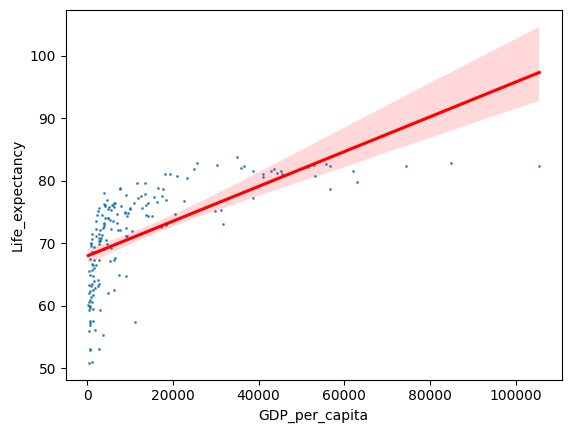

In [40]:
g = seaborn.regplot(data, x="GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"})

In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "Life_expectancy ~ GDP_per_capita"
mod = smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     116.1
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           3.90e-21
Time:                        22:38:38   Log-Likelihood:                -576.78
No. Observations:                 179   AIC:                             1158.
Df Residuals:                     177   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9538      0.561    121.219      0.000      66.848      69.060
GDP_per_capita     0.0003   2.58e-05     10.774      0.000       0.000       0.000
==============================================================================
Omnibus:                       18.171   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.349
Skew:                          -0.846   Prob(JB):                     2.31e-05
Kurtosis:                       3.037   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Diphtheria + Polio + BMI + Measles " 
mod = smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     92.03
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.22e-54
Time:                        22:38:38   Log-Likelihood:                -482.13
No. Observations:                 179   AIC:                             980.3
Df Residuals:                     171   BIC:                             1006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9443      4.016      9.449      0.000      30.018      45.871
GDP_per_capita     0.0001   1.96e-05      5.565      0.000    7.05e-05       0.000
Schooling          0.8445      0.146      5.791      0.000       0.557       1.132
Incidents_HIV     -1.4128      0.173     -8.154      0.000      -1.755      -1.071
Diphtheria        -0.0035      0.051     -0.067      0.946      -0.105       0.098
Polio              0.1385      0.060      2.304      0.022       0.020       0.257
BMI                0.4254      0.161      2.646      0.009       0.108       0.743
Measles            0.0390      0.023      1.731      0.085      -0.005       0.083
==============================================================================
Omnibus:                        3.894   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.965
Skew:                          -0.347   Prob(JB):                        0.138
Kurtosis:                       2.774   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Výrazně snižuje délku života nákaza virem HIV (počet případů na osobu).

Záporné znaménko koeficientu snižuje délku života a to můžeme vidět u sloupce `Incidents_HIV` a `Diphtheria`  naopak kladné znaménko koeficientu zvyšuje délku života a to výrazně u sloupce `Schooling` a `BMI` a méně u `Polio`.

Sestaven model z vybraných sloupců

In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Diphtheria + Polio + BMI + Measles "
mod = smf.ols(formula, data)
res = mod.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     92.03
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.22e-54
Time:                        22:38:38   Log-Likelihood:                -482.13
No. Observations:                 179   AIC:                             980.3
Df Residuals:                     171   BIC:                             1006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9443      4.016      9.449      0.000      30.018      45.871
GDP_per_capita     0.0001   1.96e-05      5.565      0.000    7.05e-05       0.000
Schooling          0.8445      0.146      5.791      0.000       0.557       1.132
Incidents_HIV     -1.4128      0.173     -8.154      0.000      -1.755      -1.071
Diphtheria        -0.0035      0.051     -0.067      0.946      -0.105       0.098
Polio              0.1385      0.060      2.304      0.022       0.020       0.257
BMI                0.4254      0.161      2.646      0.009       0.108       0.743
Measles            0.0390      0.023      1.731      0.085      -0.005       0.083
==============================================================================
Omnibus:                        3.894   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.965
Skew:                          -0.347   Prob(JB):                        0.138
Kurtosis:                       2.774   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
data["residuals"] = res.resid
data["predictions"] = res.fittedvalues
data[["Life_expectancy", "GDP_per_capita", "Schooling", "Incidents_HIV", "Diphtheria", "Polio", "BMI", "Measles", "predictions", "residuals"]]

,Life_expectancy,GDP_per_capita,Schooling,Incidents_HIV,Diphtheria,Polio,BMI,Measles,predictions,residuals
0,76.5,11006,7.8,0.08,97,97,27.8,65,73.084861,3.415139
1,82.8,25742,9.7,0.09,97,97,26.0,94,76.650501,6.149499
6,71.2,9313,12.0,0.08,97,97,26.2,97,77.014650,-5.814650
27,57.6,1383,6.1,1.12,84,77,24.3,64,64.875269,-7.275269
43,60.9,661,3.4,0.96,97,96,23.9,64,65.159034,-4.259034
...,...,...,...,...,...,...,...,...,...,...
2753,75.9,4095,7.0,0.04,98,98,26.3,98,72.495299,3.404701
2820,72.6,17318,10.1,0.40,87,87,26.7,83,74.148231,-1.548231
2840,64.1,2653,4.1,0.22,84,84,24.0,82,66.140785,-2.040785
2846,73.6,2050,6.5,0.11,98,99,27.2,83,71.686971,1.913029


Nulová hypotéza - průměrná délka života v souboru mají normální rozdělení reziduí

Alternativní hypotéza - průměrná délka života v souboru nemají normální rozdělení reziduí

ph hodnota je > 0.05 nezamítáme nulovou hypotézu
Prob(Omnibus):	0.143	
Prob(JB):	0.138

Koeficient determinace z modelu kde je pouze hrubý domácí produkt: R-squared:	0.396

Koeficient determinace u výsledného modelu R-squared:	0.790

Koeficient determinance u výsledného modelu je vyšší a to nám udává kvalitu, úspěšnost a přesnost modelu.


Odebrán řádek s největší ph hodnotou Diphtheria	0.946

Koeficient determinace se nezměnil 0.790

                coef	

Intercept	    37.9505	

GDP_per_capita	0.0001

Schooling	    0.8455

Incidents_HIV	-1.4129	

Polio	        0.1349	

BMI	            0.4260	

Measles	        0.0389	


# Úkol 3

Stáhni si data ze souboru [Life-Expectancy-Data-Updated.csv](soubory_03/Life-Expectancy-Data-Updated.csv), která udávají průměrnou dobu života v jednotlivých zemích světa. Data pocházejí od Světové zdravotnické organizace (WHO) a Světové banky. Vytvoř regresní model, jehož úkolem bude zjistit, které faktory ovlivňují průměrnou délku života.

- Vyber data pro jeden konkrétní rok (např. pro rok 2015).
- Vysvětlovanou proměnnou ve tvém modelu bude `Life expectancy`, což je průměrná délka života.
- Délku dožití určitě bude ovlivňovat bohatství země, které lze vyjádřit ve hrubém domácím produktu na hlavu. Začni s modelem, který má jako vysvětlující proměnnou sloupec `GDP_per_capita` (hrubý domácí produkt na hlavu v dolarech). Zobraz výsledek jako graf. Dále si zobraz tabulku s využitím metody využitím modulu `scipy` a metody `summary()` a zjisti koeficient determinace.

Do modelu přidej následující sloupce:

- `Schooling` - průměrná délka studia (v letech),
- `Incidents_HIV` - nákazy virem HIV (počet případů na osobu)
- `Diphtheria` - procento populace očkované proti záškrtu,
- `Polio` - procento populace očkované proti dětské obrně,
- `BMI` - průměrný BMI index populace,
- `Measles` - procento populace očkované proti spalničkám.

U každého sloupce se zamysli nad tím, jestli může délku života výrazně ovlivnit a jaké tipuješ znaménko koeficientu (kladné - zvyšuje délku života, záporné - snižuje délku života).

Sestav model z vybraných sloupců a proveď následující kroky:

- Formuluj hypotézu o normalitě reziduí a otestuj ji s využitím modulu `scipy` a metody `summary()`. Jaký je výsledek - mají rezidua normální rozdělení?
- Jaký je koeficient determinace výsledného modelu. Porovnej ho s koeficientem determinace, který vyšel z modelu, kde byl pouze hrubý domácí produkt. Jak se změnil? A co to znamená?
- Pokud jsi nezamítl(a) hypotézu normality, podívej se do sloupce `P>|t|` a vyber řádek s nejvyšší p-hodnotou. Koeficient pro daný řádek odeber z modelu. Jak se změnila hodnota ostatních koeficientů? Jak se změnil koeficient determinace?

**Hypotézy a odpovědi na otázky, které jsou součástí zadání, prosím piš jako text v Jupyter notebooku nebo jako komentář ke zdrojovému kódu. Komentáře stačí stručné, nechceme článek, ale jde jen o to, abychom věděli, že je látka jasná.**


### Nápovědy

Nápovědy obsahují pouze čísla, chybí formulace hypotéz a interpretace výsledků.

V modelu, kde je pouze hrubý domácí produkt na hlavu, by ti měli vyjít koeficienty `67.9538` v řádku `intercept` a `0.0003` v řádku `GDP_per_capita`. Koeficient determinace je `0.396`.

V tabulce níže jsou hodnoty všech koeficientů

| Variable        | Coefficient |
|-----------------|-------------|
| Intercept       | 37.9443     |
| GDP_per_capita  | 0.0001      |
| Schooling       | 0.8445      |
| Incidents_HIV   | -1.4128     |
| Diphtheria      | -0.0035     |
| Polio           | 0.1385      |
| BMI             | 0.4254      |
| Measles         | 0.0390      |

Koeficient determinace je nyní `0.790`. p-hodnoty testů normality jsou `0.143` a `0.138`. V závislosti na tom, co tento výsledek znamená, je nebo není potřeba vytvořit ještě jeden regresní model, který bude mít o sloupec méně. Případný nový model bude mít koeficient determinace též `0.790`.